<a href="https://colab.research.google.com/github/Shovan-1/CVPR-Summer-2025/blob/main/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IPython.core.display.Javascript object>

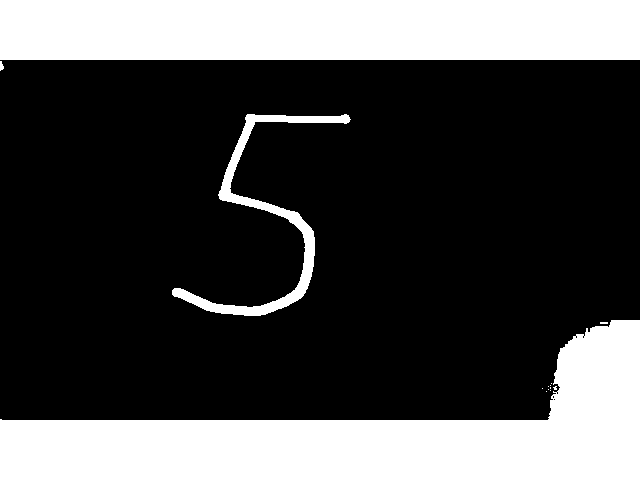

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction: 5 (Confidence: 55.45%)


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

# Load saved model (make sure mnist_model.h5 is uploaded to Colab first)
model = tf.keras.models.load_model("mnist_model.h5")



# Webcam capture function
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = ' Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize iframe
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture click
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();

        return canvas.toDataURL('image/jpeg', quality);
      }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Take photo
filename = take_photo()

# Preprocess image
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Threshold like MNIST (white digit on black bg)
_, thres = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)

# Show processed image
cv2_imshow(thres)

# Run prediction
digit, acc = predict_digit(thres)
print(f"Prediction: {digit} (Confidence: {acc*100:.2f}%)")
